# Interactive Run

Using bits of 'run_eddy_NP_model.py' to make figures on the cluster in the notebook.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from eddy_NP_model_functions import reformat_1D_to_2D,FE_upwind_2D_adv_diff_eddy_NP_model,FE_upwind_2D_adv_diff_eddy_NPP_model,animate_eddy_NP_sim,concentration_sum_fig

In [2]:
# Experimental variables
P_combo = 'SLu' # 'S', 'L', 'SLu', or 'SLe'
alter_vort = 0 # 0 (coherent) or 1 (leaky)
death_rate = 0.5 #d^-1

In [3]:
# Set up grid and time stepping
Lx,Ly = 50,50 # Lx & Ly are the dimensions of psi, so the tracer has dimension (Lx-1,Ly-1)
del_x,del_y,del_t = 2000,2000,3000
num_steps = 100#2419 ######## EDDY PEAKS @ 6 WEEKS = 1209 timesteps, EDDY DIES @ 12 WEEKS = 2419 timesteps

all_P = [] # will hold the data for each of the phytoplankton
if (P_combo == 'S') or (P_combo == 'L'): # one phytoplankton
    numP = 1
    P_mat,N_mat,psi_mat,N_star,P_star = FE_upwind_2D_adv_diff_eddy_NP_model(Lx,Ly,del_x,del_y,del_t,num_steps,alter_vort,P_combo,death_rate)
    P_2D = reformat_1D_to_2D(P_mat,Lx-1,Ly-1)
    all_P.append(P_2D)
    P_stars = [P_star] #array used for setting max value in figures
    if (P_combo == 'S'):
        size = ['Small'] #array used for figure-making
    elif (P_combo == 'L'):
        size = ['Large']

elif (P_combo == 'SLu') or (P_combo == 'SLe'): # two phytoplankton
    numP = 2
    PL_mat,PS_mat,N_mat,psi_mat,N_star,P_star_S,P_star_L = FE_upwind_2D_adv_diff_eddy_NPP_model(Lx,Ly,del_x,del_y,del_t,num_steps,alter_vort,P_combo,death_rate)
    PS_2D = reformat_1D_to_2D(PS_mat,Lx-1,Ly-1)
    PL_2D = reformat_1D_to_2D(PL_mat,Lx-1,Ly-1)
    all_P.append(PS_2D)
    all_P.append(PL_2D)
    P_stars = [P_star_S,P_star_L] #array used for setting max value in figures
    size = ['Small','Large'] #array used for figure-making

N_2D = reformat_1D_to_2D(N_mat,Lx-1,Ly-1)
psi_2D = reformat_1D_to_2D(psi_mat,Lx,Ly)

0
10
20
30
40
50
60
70
80
90


In [4]:
anim = animate_eddy_NP_sim(Lx,Ly,del_x,del_y,del_t,5,2,size,psi_2D,all_P,N_2D)
plt.close(anim._fig)
HTML(anim.to_html5_video())

#anim.save('./animations/NPP_%s_%s_eddy.gif'%(P_combo,eddy_type))

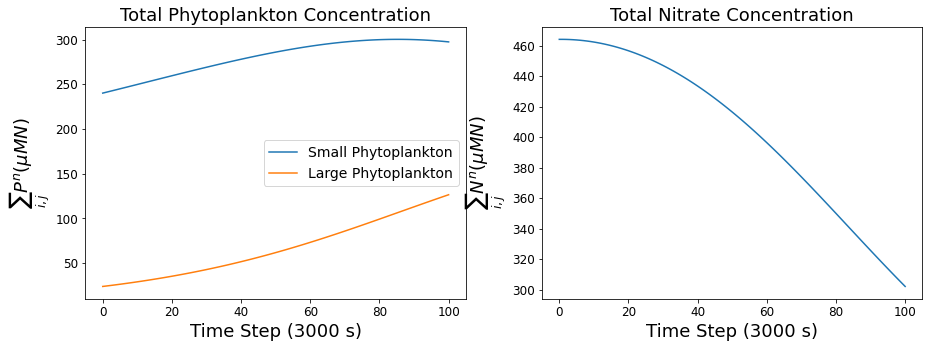

In [5]:
plt = concentration_sum_fig(2,del_t,psi_2D,all_P,N_2D)
plt.show()

#plt.savefig('./figs/NPP_conc_sum_%s_%s_eddy.png'%(P_combo,eddy_type))